# Homicides by Countries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("homicide_by_countries.csv")
df.head()

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012


In [3]:
df.isna().sum()

Location     0
Region       0
Subregion    0
Rate         0
Count        0
Year         0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Location   195 non-null    object 
 1   Region     195 non-null    object 
 2   Subregion  195 non-null    object 
 3   Rate       195 non-null    float64
 4   Count      195 non-null    int64  
 5   Year       195 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.3+ KB


## LOCATION

In [33]:
top_rated_countries = df[['Location','Count']].sort_values('Count', ascending= False, ignore_index= True).head()
top_rated_countries["Percent"] = (top_rated_countries['Count'] * 100 / top_rated_countries['Count'].sum()).round(2)
top_rated_countries

,Location,Count,Percent
0,Brazil,47722,25.02
1,Nigeria,44200,23.18
2,India,40651,21.31
3,Mexico,36579,19.18
4,United States,21570,11.31


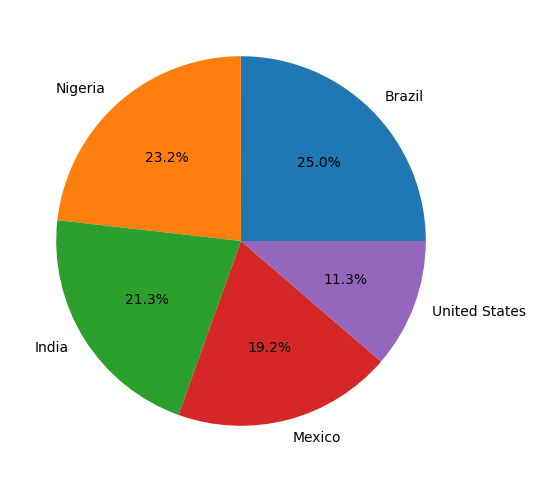

In [34]:
plt.figure(figsize=(12,6))

plt.pie(data= top_rated_countries, x = top_rated_countries['Percent'],
        labels= top_rated_countries['Location'],
        autopct='%1.1f%%')
plt.show()

## REGION

In [42]:
top_region = df.groupby('Region', as_index= False)['Count'].sum().sort_values('Count', ascending= False)

top_region

,Region,Count
1,Americas,153597
2,Asia,105552
0,Africa,99481
3,Europe,19869
4,Oceania,347


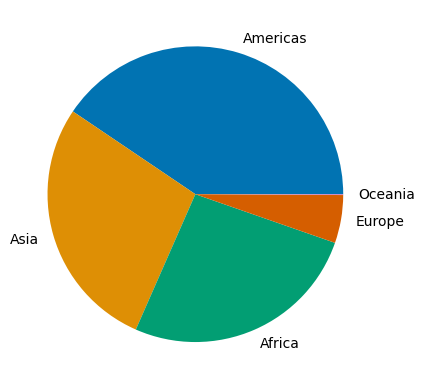

In [52]:
colors = sns.color_palette('colorblind')[0:5]

plt.pie(data= top_region,
        x= top_region['Count'],
        labels= top_region['Region'],
        colors= colors)
plt.show()

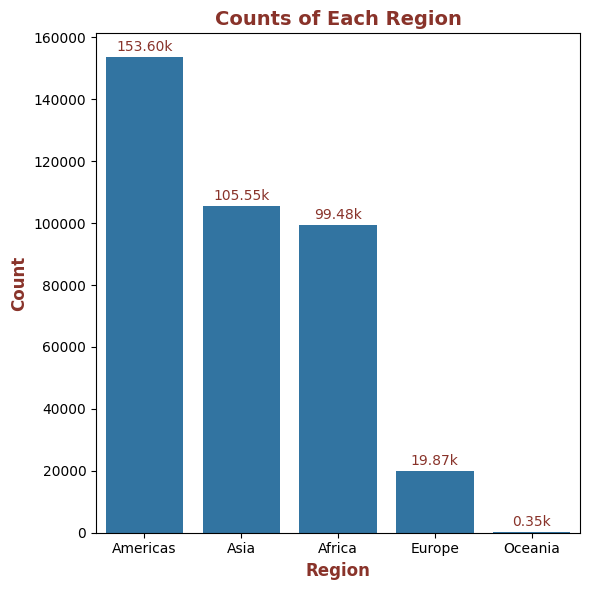

In [68]:
plt.figure(figsize=(6,6))
myplot = sns.barplot(data= top_region, x= 'Region', y ='Count')

for bar in myplot.containers:
    myplot.bar_label(bar,
                     labels = [f'{v/1000:0.2f}k' for v in bar.datavalues],
                     padding= 2,
                     color = '#89332a')

plt.title("Counts of Each Region",
          fontdict={"fontsize": 14,
                    'fontweight': 'bold',
                    'color': '#89332a'})

plt.xlabel("Region",
          fontdict={"fontsize": 12,
                    'fontweight': 'bold',
                    'color': '#89332a'})
plt.ylabel("Count",
          fontdict={"fontsize": 12,
                    'fontweight': 'bold',
                    'color': '#89332a'})
plt.tight_layout()   
plt.show()

## Years

In [100]:
df2 = df[df['Region'].isin(['Americas','Asia'])].reset_index(drop= True)
df2.head()

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Anguilla,Americas,Caribbean,28.3,4,2014
2,Antigua and Barbuda,Americas,Caribbean,9.2,9,2020
3,Argentina,Americas,South America,5.3,2416,2020
4,Armenia,Asia,Western Asia,1.8,52,2020


In [112]:
top_years = df2.groupby(['Year','Region'])['Count'].sum().reset_index().sort_values('Count', ascending= False, ignore_index= True)
top_years

,Year,Region,Count
0,2020,Americas,134784
1,2020,Asia,53516
2,2018,Asia,16923
3,2021,Asia,15299
4,2018,Americas,13793
5,2019,Asia,6458
6,2013,Asia,5782
7,2019,Americas,4276
8,2014,Asia,3029
9,2017,Asia,1787


<Axes: xlabel='Year', ylabel='Count'>

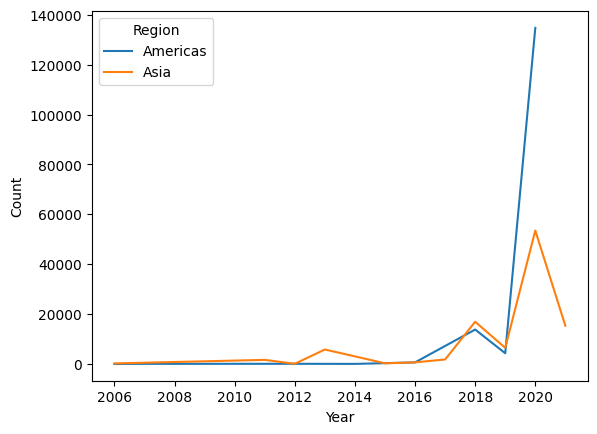

In [102]:
sns.lineplot(data= top_years, x= 'Year', y= 'Count', hue = 'Region')

## SUB REGION

In [103]:
df.head()

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012


In [127]:
top_subregion = df.groupby(['Subregion','Region'])['Count'].sum().reset_index().sort_values(by='Count',ascending= False, ignore_index= True)
top_subregion

,Subregion,Region,Count
0,South America,Americas,78872
1,Southern Asia,Asia,58631
2,Central America,Americas,47371
3,Western Africa,Africa,46318
4,South-Eastern Asia,Asia,25314
5,Eastern Africa,Africa,23669
6,Northern America,Americas,22317
7,Southern Africa,Africa,21479
8,Eastern Europe,Europe,14604
9,Western Asia,Asia,11638


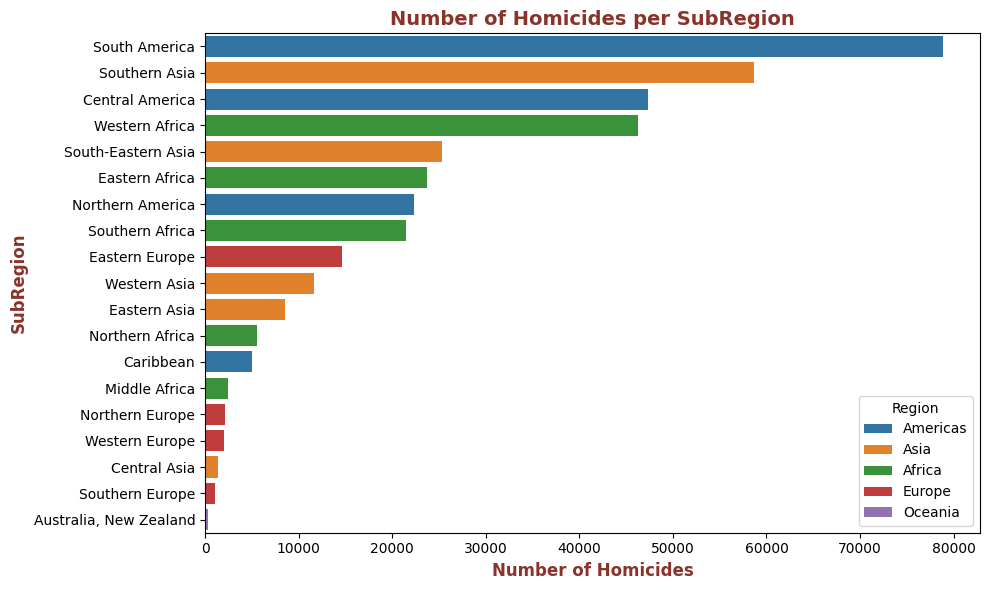

In [133]:
plt.figure(figsize=(10,6))
sns.barplot(data= top_subregion,
            y=  'Subregion',
            x= 'Count',
            hue= 'Region')

plt.title("Number of Homicides per SubRegion",
          fontdict={"fontsize": 14,
                    'fontweight': 'bold',
                    'color': '#89332a'})

plt.xlabel("Number of Homicides",
          fontdict={"fontsize": 12,
                    'fontweight': 'bold',
                    'color': '#89332a'})
plt.ylabel("SubRegion",
          fontdict={"fontsize": 12,
                    'fontweight': 'bold',
                    'color': '#89332a'})

plt.tight_layout()
plt.show()